# using Decision Tree 

In [18]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import seaborn as sns

In [19]:
def print_model_performance(model, y, prediction, id):
    # print ('coeffecient:', model.coef_)
    # print ('intercept: ', model.intercept_)
    print (f'Mean squared Error (MSE): {mean_squared_error(y, prediction):.2f}')
    print (f'Mean absolute Error (MAE): {mean_absolute_error(y, prediction):.2f}')
    print (f'Coeffecint of determination (R2): {r2_score(y, prediction):.2f}')
    sns.scatterplot(x=y, y=prediction)


# Use Decision Tree Regression - One leaf

In [20]:
def reg_decision_tree_1(train_X, val_X, train_y, val_y):
    # Specify Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    # print("Validation MAE: {:,.0f}".format(val_mae))
    print_model_performance(iowa_model, val_y, val_predictions,1)


# Use Decision Tree with optimizating max_leaf_nodes

In [21]:
# model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [22]:
def reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y):
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    mae=[]
    for i, max_leaf in enumerate(candidate_max_leaf_nodes):
        #print (i, max_leaf)
        x = get_mae(max_leaf, train_X, val_X, train_y, val_y)
        mae.append(x)
        print(f"Max leaf nodes: {max_leaf}  \t\t Mean Absolute Error:  {x}")
        
    # Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
    m = mae.index(min(mae))
    best_tree_size = candidate_max_leaf_nodes[m]

    final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
    # fit the final model 
    final_model.fit(X, y)
    pred = final_model.predict(val_X)
    print_model_performance(final_model, val_y, pred, 2)

# Use Random Forest regression model

In [23]:

# from sklearn.metrics import mean_absolute_error
def use_forest_regression(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    print_model_performance(forest_model, val_y, melb_preds, 3)

# Use Linear model regression

In [24]:
def use_linear_model(train_X, eval_X, train_y, eval_y):
    model = linear_model.LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)
    print_model_performance(model, eval_y, pred, 4)
    # print ('Mead squared Error (MSE):', mean_squared_error(val_y, pred))

# Regression analysus using 4 methods

In [ ]:
iowa_file_path = r"C:\Yahia\Python\ML\data\train.csv"
home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)

### Boston House data

************ Decision Tree one level ***************
Mean squared Error (MSE): 20.61
Mean absolute Error (MAE): 3.07
Coeffecint of determination (R2): 0.63

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  3.40108938130674
Max leaf nodes: 25  		 Mean Absolute Error:  2.627997860311646
Max leaf nodes: 50  		 Mean Absolute Error:  2.7319911434157937
Max leaf nodes: 100  		 Mean Absolute Error:  2.9027547180488353
Max leaf nodes: 250  		 Mean Absolute Error:  2.9633846872082166
Max leaf nodes: 500  		 Mean Absolute Error:  2.965686274509805
Mean squared Error (MSE): 1.09
Mean absolute Error (MAE): 0.84
Coeffecint of determination (R2): 0.98

************ User Forest model regression ***************
Mean squared Error (MSE): 8.41
Mean absolute Error (MAE): 2.03
Coeffecint of determination (R2): 0.85

************ Linear Model ***************
Mean squared Error (MSE): 21.34
Mean absolute Error (MAE): 3.36
Coeffecint of determinatio

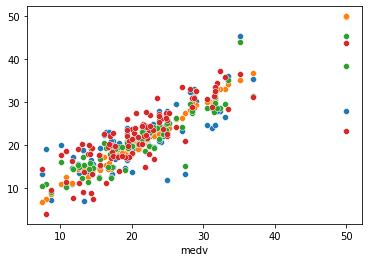

In [29]:
file_path = r"C:\Yahia\Python\ML\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)
